<img src="./logo_UNSAM.jpg" align="right" width="150" />

# Trabajo Práctico 2- corregido
**Carola Piazze Vicini**

## Introducción

El objetivo de este trabajo fue analizar y simular el comportamiento de sistemas lineales e invariantes en el tiempo (LTI), mediante la resolución de ecuaciones en diferencias, el cálculo de la respuesta al impulso, y la implementación de convolución en tiempo discreto. 

### Sistemas LTI
Un sistema LTI (lineal e invariante en el tiempo) es un tipo de sistema cuya salida se puede predecir completamente a partir de su entrada.
Es **lineal** porque cumple con los principios de superposición y homogeneidad, e **invariante en el tiempo** porque su comportamiento y parámetros no cambian al desplazar la señal de entrada.
En tiempo discreto, muchos sistemas LTI se describen mediante ecuaciones en diferencias, que relacionan muestras actuales y pasadas de la salida con muestras de la entrada.  

Una forma general es:

$$
y[n] + a_1 y[n-1] + a_2 y[n-2] + \dots + a_N y[n-N] = b_0 x[n] + b_1 x[n-1] + \dots + b_M x[n-M]
$$

donde:
- **y[n]**: salida del sistema  
- **x[n]**: entrada del sistema  
- **aᵢ** y **bⱼ**: coeficientes constantes que definen el comportamiento del sistema  
  
Resolver esta ecuación equivale a encontrar la dinámica del sistema, es decir, cómo responde la salida a cualquier señal de entrada.  

En particular, si la entrada es un impulso unitario delta[n], la salida resultante es la respuesta al impulso **h[n]**.  

La relación fundamental entre entrada y salida se expresa como la **convolución** entre la señal de entrada y la respuesta al impulso:

$$
y[n] = (x * h)[n] = \sum_{k=-\infty}^{\infty} x[k] \, h[n-k]
$$

De esta forma, conocer \(h[n]\) permite predecir la salida para cualquier señal de entrada.

La convolución discreta es la operación que combina dos secuencias para producir una tercera, y describe cómo la forma de \(h[n]\) moldea a la entrada \(x[n]\).  

Para señales de duración finita, la expresión se reduce a una suma finita:

$$
y[n] = \sum_{k=0}^{N-1} x[k] \, h[n-k]
$$

En la práctica, se implementan bucles o funciones como np.convolve para obtener la salida de la forma más eficiente posible a partir de la respuesta al impulso.  

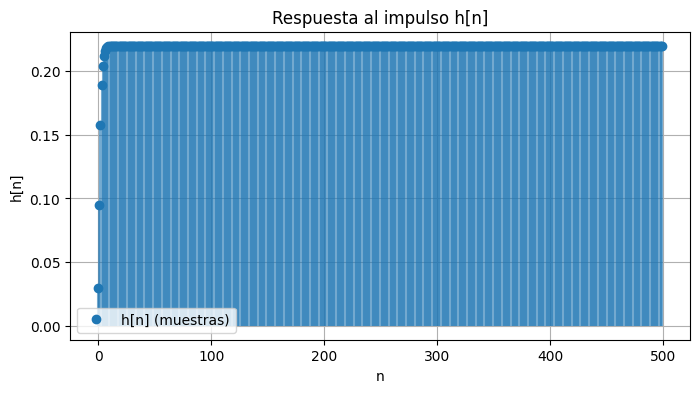


Señal: x1_seno
  Frecuencia de muestreo: 60000.0 Hz
  Duración: 0.002000 s


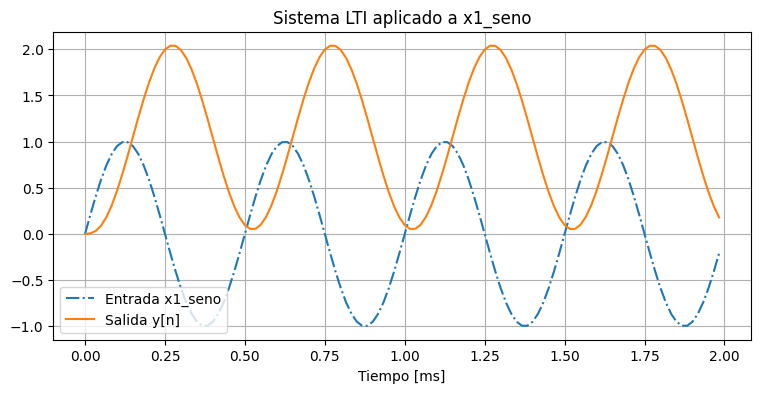

  Potencia de salida (estimada) para x1_seno: 1.592266e+00

Señal: x2_seno_A2_desfase
  Frecuencia de muestreo: 60000.0 Hz
  Duración: 0.002000 s


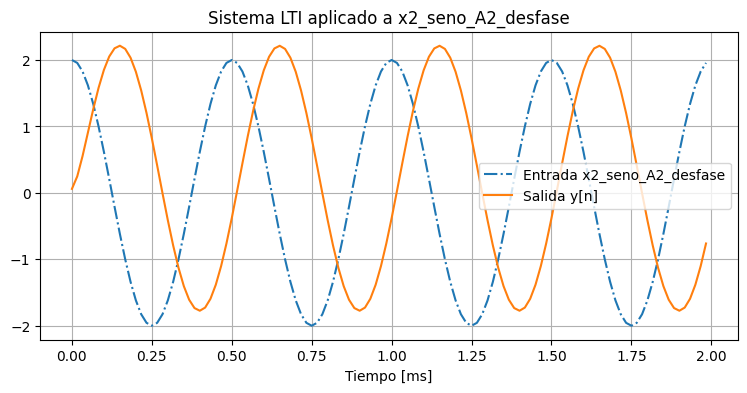

  Potencia de salida (estimada) para x2_seno_A2_desfase: 2.039398e+00

Señal: x3_AM
  Frecuencia de muestreo: 60000.0 Hz
  Duración: 0.002000 s


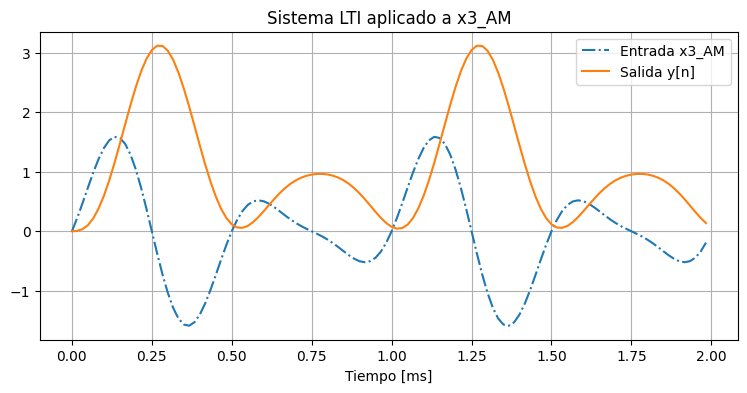

  Potencia de salida (estimada) para x3_AM: 1.967413e+00

Señal: x1_clipped
  Frecuencia de muestreo: 60000.0 Hz
  Duración: 0.002000 s


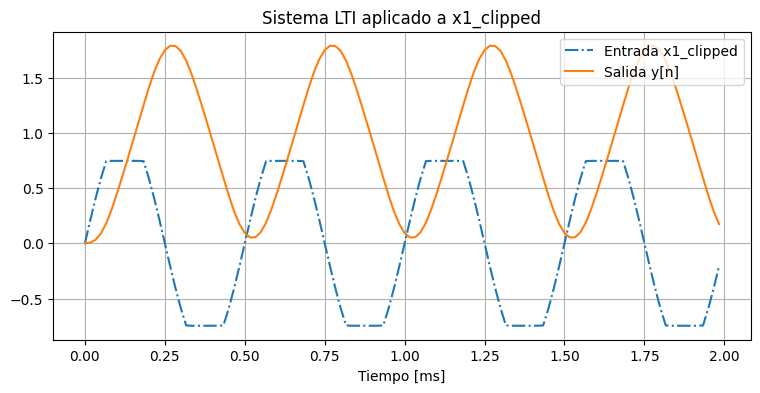

  Potencia de salida (estimada) para x1_clipped: 1.209867e+00

Señal: x_cuadrada
  Frecuencia de muestreo: 60000.0 Hz
  Duración: 0.005000 s


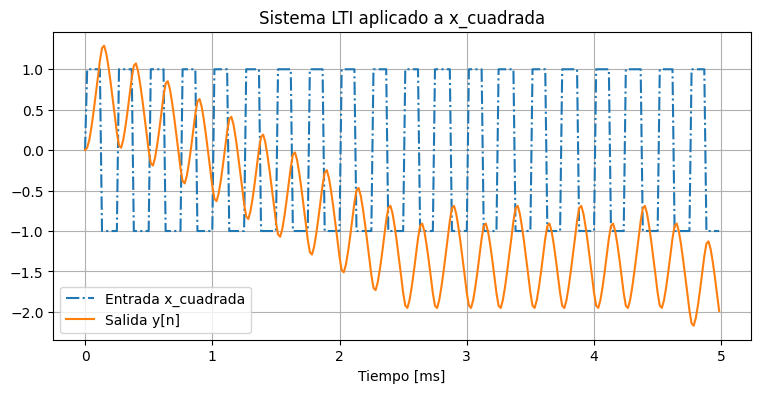

  Potencia de salida (estimada) para x_cuadrada: 1.366065e+00

Señal: x_rectangular_10ms
  Frecuencia de muestreo: 60000.0 Hz
  Duración: 0.020000 s


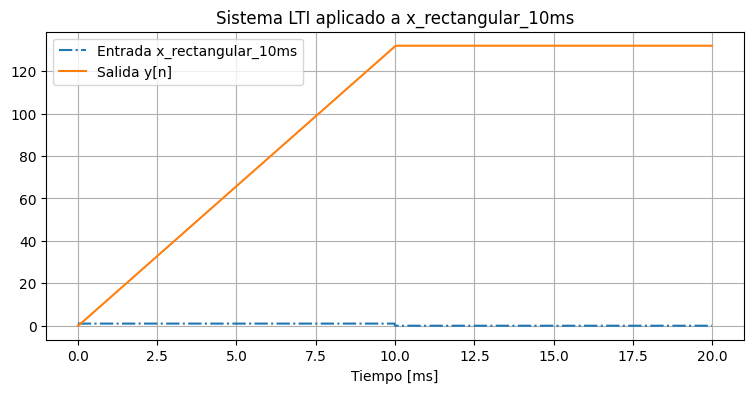

  Energía de salida para x_rectangular_10ms: 2.318833e+02


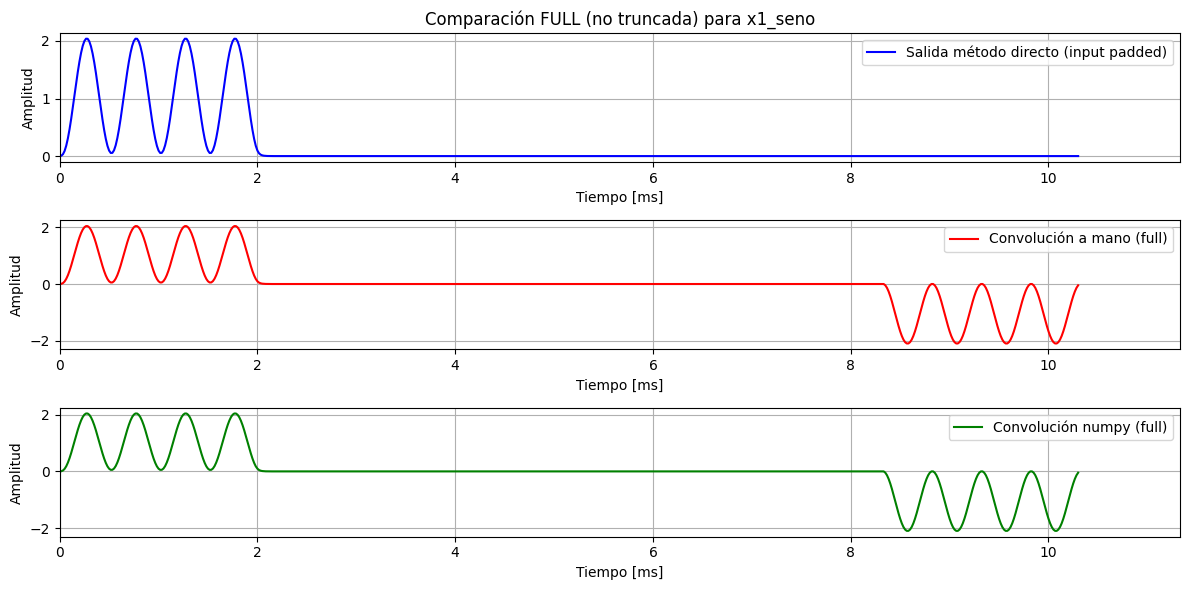

  Máx |y_lti_pad - conv_amano_full| = 2.093e+00
  Máx |y_lti_pad - conv_numpy_full| = 2.093e+00


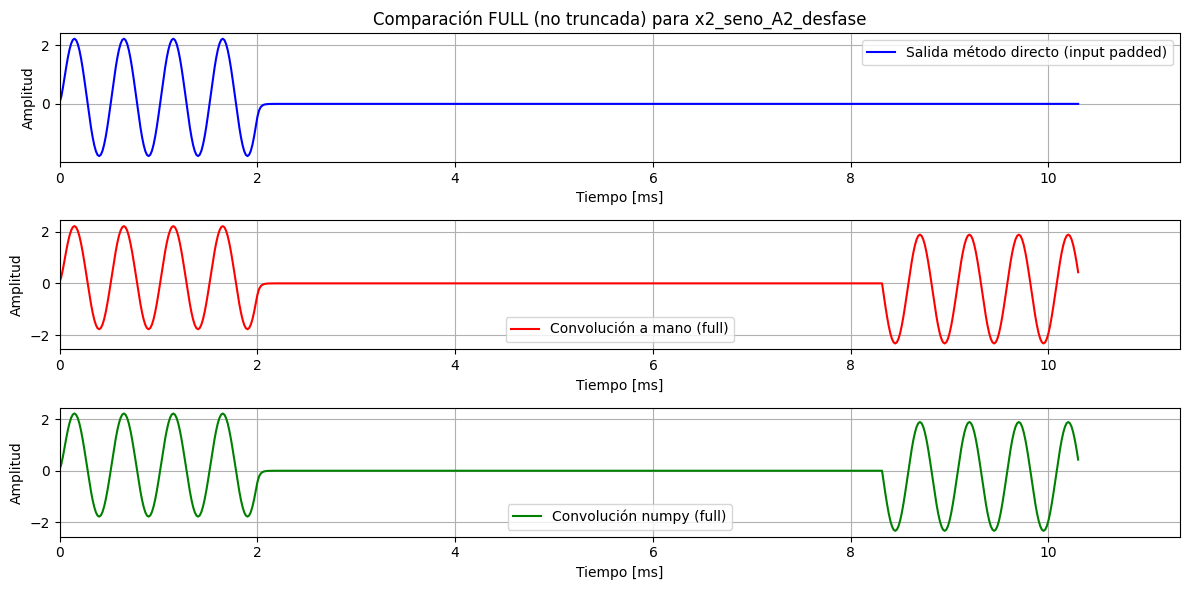

  Máx |y_lti_pad - conv_amano_full| = 2.325e+00
  Máx |y_lti_pad - conv_numpy_full| = 2.325e+00


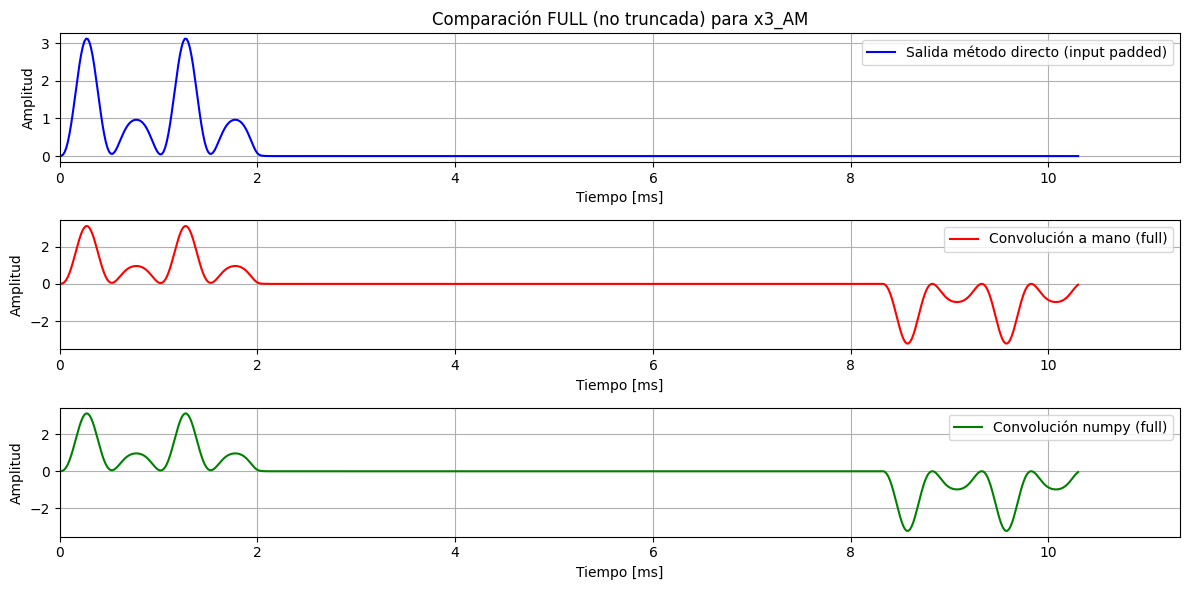

  Máx |y_lti_pad - conv_amano_full| = 3.211e+00
  Máx |y_lti_pad - conv_numpy_full| = 3.211e+00


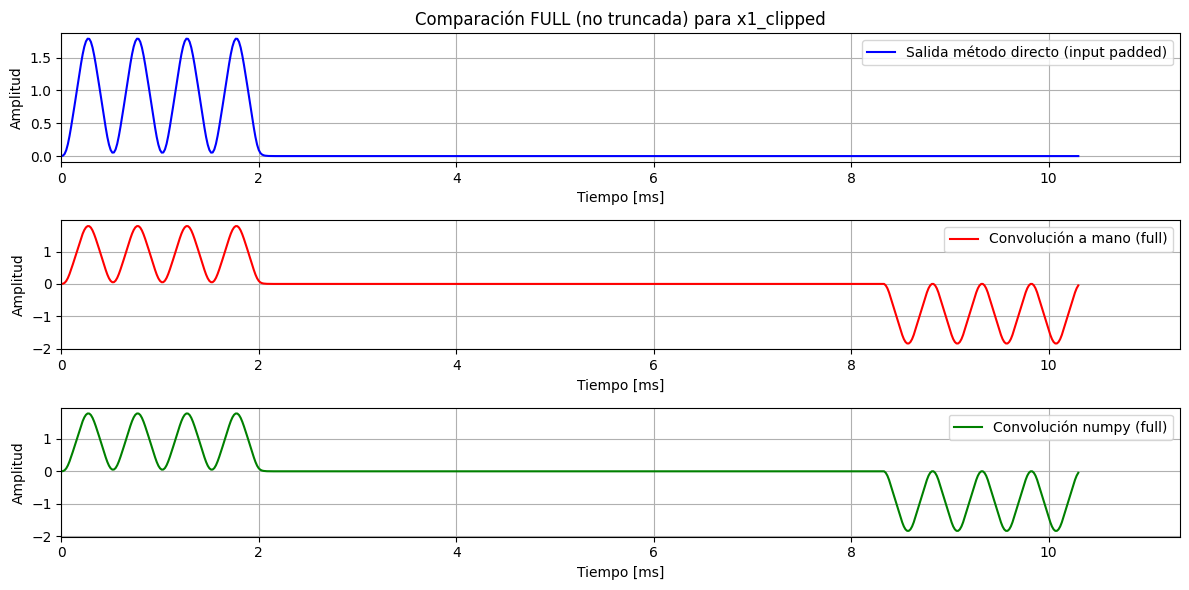

  Máx |y_lti_pad - conv_amano_full| = 1.841e+00
  Máx |y_lti_pad - conv_numpy_full| = 1.841e+00


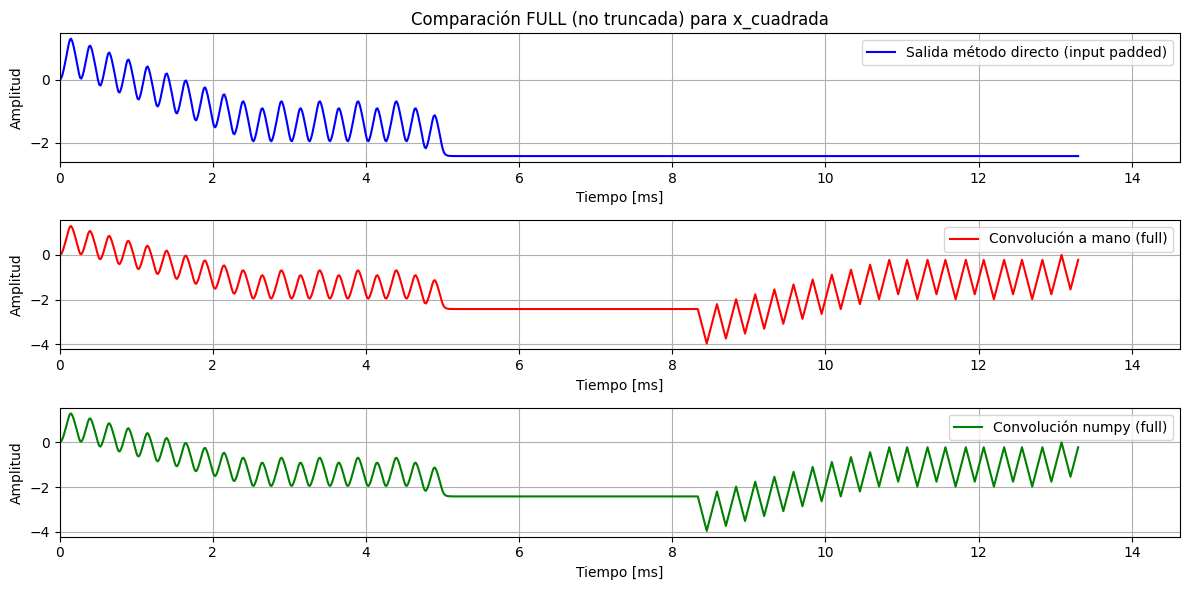

  Máx |y_lti_pad - conv_amano_full| = 2.420e+00
  Máx |y_lti_pad - conv_numpy_full| = 2.420e+00


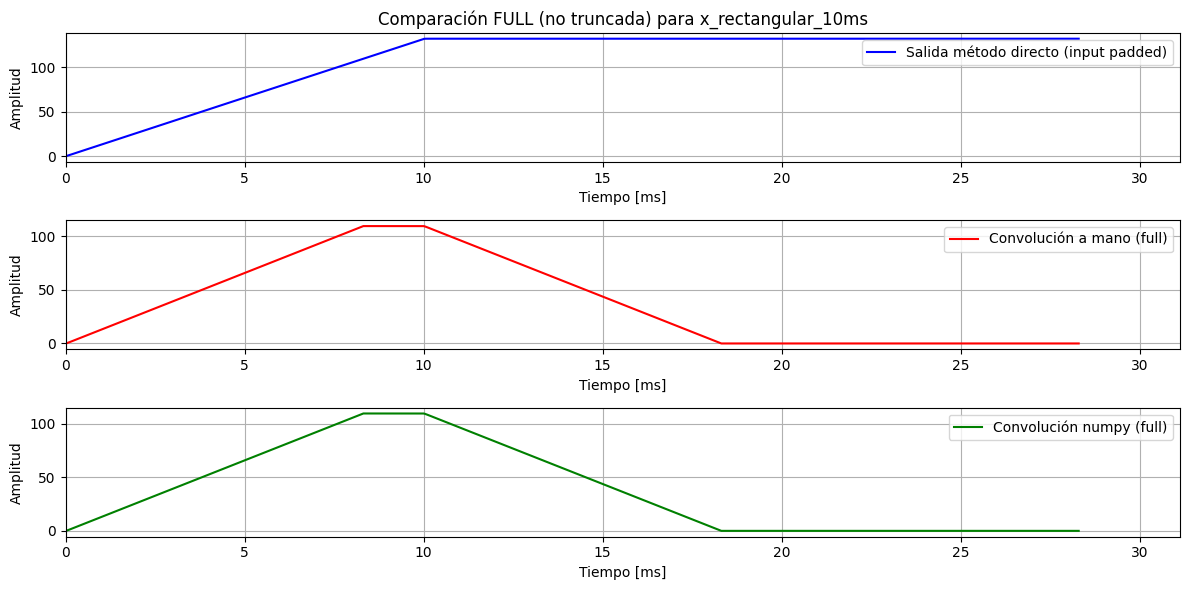

  Máx |y_lti_pad - conv_amano_full| = 1.320e+02
  Máx |y_lti_pad - conv_numpy_full| = 1.320e+02


In [17]:
import numpy as np
import matplotlib.pyplot as plt

fs = 60000.0      # Hz
Ts = 1.0 / fs

# tiempos
t_seno = np.linspace(0, 0.002, int(fs*0.002), endpoint=False)   # 2 ms
t_cuadrada = np.linspace(0, 0.005, int(fs*0.005), endpoint=False)  # 5 ms
t_pulso = np.linspace(0, 0.02, int(fs*0.02), endpoint=False)     # 20 ms

# señales
frec = 2000.0  # Hz
x1 = np.sin(2*np.pi*frec*t_seno)                      # seno 2 kHz
x2 = 2*np.sin(2*np.pi*frec*t_seno + np.pi/2)          # A=2, desfase pi/2
frec_mod = 1000.0
m = 0.8
x3 = (1 + m*np.sin(2*np.pi*frec_mod*t_seno)) * np.sin(2*np.pi*frec*t_seno)  # AM
A = np.max(np.abs(x1))
x1_clipped = np.clip(x1, -0.75*A, 0.75*A)
frec_cuadrada = 4000.0
x_cuadrada = np.sign(np.sin(2*np.pi*frec_cuadrada*t_cuadrada))
pulso = 0.01  # 10 ms
x_rectangular = np.where(t_pulso < pulso, 1.0, 0.0)

# guardo las señales en un diccionario para iterar
senales = {
    'x1_seno': (x1, t_seno),
    'x2_seno_A2_desfase': (x2, t_seno),
    'x3_AM': (x3, t_seno),
    'x1_clipped': (x1_clipped, t_seno),
    'x_cuadrada': (x_cuadrada, t_cuadrada),
    'x_rectangular_10ms': (x_rectangular, t_pulso),
}

# funciones auxiliares
def calc_potencia(x):  # para periódicas (estimación en ventana)
    return np.mean(x**2)

def calc_energia(x, Ts):  # para finitas
    return np.sum(x**2) * Ts

def LTI_1(x):
    N = len(x)
    y = np.zeros(N)
    if N == 0:
        return y
    # caso n=0
    y[0] = 0.03 * x[0]
    # caso n=1
    if N > 1:
        y[1] = 0.03*x[1] + 0.05*x[0] + 1.5*y[0]
    for n in range(2, N):
        y[n] = (0.03*x[n] + 0.05*x[n-1] + 0.03*x[n-2]
                + 1.5*y[n-1] - 0.5*y[n-2])
    return y

def conv_amano(x, h):
    N = len(x)
    M = len(h)
    y = np.zeros(N + M - 1)
    for n in range(len(y)):
        k_min = max(0, n - M + 1)
        k_max = min(n, N - 1)
        for k in range(k_min, k_max + 1):
            y[n] += x[k] * h[n - k]
    return y

def impulso(sistema, N_impulso=100):
    delta = np.zeros(N_impulso)
    delta[0] = 1.0
    h = sistema(delta)
    return h

# ======================== ITEM 1: aplicar LTI y calcular energía/potencia

periodicas = {'x1_seno', 'x2_seno_A2_desfase', 'x3_AM', 'x1_clipped', 'x_cuadrada'}
# pulsos/ventanas -> energía

h = impulso(LTI_1, N_impulso=500)
n_h = np.arange(len(h))


plt.figure(figsize=(8,4))
plt.plot(n_h, h, 'o', label='h[n] (muestras)')          
plt.vlines(n_h, 0, h, colors='tab:blue', alpha=0.6)     
plt.xlabel('n')
plt.ylabel('h[n]')
plt.title('Respuesta al impulso h[n]')
plt.grid(True)
plt.legend()
plt.show()

for nombre, (x, t) in senales.items():
    y_lti = LTI_1(x)  
    duracion = t[-1] + Ts
    print(f"\nSeñal: {nombre}")
    print(f"  Frecuencia de muestreo: {fs} Hz")
    print(f"  Duración: {duracion:.6f} s")
    
    plt.figure(figsize=(9,4))
    plt.plot(t*1000, x, '-.', label="Entrada " + nombre)
    plt.plot(t*1000, y_lti, '-', label="Salida y[n]")
    plt.xlabel("Tiempo [ms]")
    plt.title("Sistema LTI aplicado a " + nombre)
    plt.legend()
    plt.grid(True)
    plt.show()

    # energía/potencia
    if nombre in periodicas:
        pot = calc_potencia(y_lti)
        print(f"  Potencia de salida (estimada) para {nombre}: {pot:.6e}")
    else:
        ener = calc_energia(y_lti, Ts)
        print(f"  Energía de salida para {nombre}: {ener:.6e}")

# ======================== Comparación de convolución (para cada señal)
## APLICO PADDING PARA VER EL ESPECTRO COMPLETO, antes estaba truncada y eso daba una gráfica corta que no
#mostraba correctamente el comportamiento

for nombre, (x, t) in senales.items():
    N = len(x)
    M = len(h)
    # convoluciones (full)
    y_amano_full = conv_amano(x, h)               
    y_numpy_full = np.convolve(x, h, mode='full') 

   
    x_pad = np.concatenate([x, np.zeros(M-1)])    
    y_lti_pad = LTI_1(x_pad)                      

    
    t_full = np.arange(len(y_amano_full)) * Ts
    t_full_ms = t_full * 1000.0

    
    plt.figure(figsize=(12,6))

    plt.subplot(3,1,1)
    plt.plot(t_full_ms, y_lti_pad, 'b-', label='Salida método directo')
    plt.title(f'Comparación FULL (no truncada) para {nombre}')
    plt.xlabel('Tiempo [ms]')
    plt.ylabel('Amplitud')
    plt.grid(True)
    plt.legend()
 
    plt.xlim(0, t_full_ms[-1]*1.1)

    plt.subplot(3,1,2)
    plt.plot(t_full_ms, y_amano_full, 'r-', label='Convolución a mano')
    plt.xlabel('Tiempo [ms]')
    plt.ylabel('Amplitud')
    plt.grid(True)
    plt.legend()
    plt.xlim(0, t_full_ms[-1]*1.1)

    plt.subplot(3,1,3)
    plt.plot(t_full_ms, y_numpy_full, 'g-', label='Convolución numpy')
    plt.xlabel('Tiempo [ms]')
    plt.ylabel('Amplitud')
    plt.grid(True)
    plt.legend()
    plt.xlim(0, t_full_ms[-1]*1.1)

    plt.tight_layout()
    plt.show()

    diff_amano = np.max(np.abs(y_lti_pad[:len(y_amano_full)] - y_amano_full))
    diff_numpy = np.max(np.abs(y_lti_pad[:len(y_numpy_full)] - y_numpy_full))
    print(f"  Máx |y_lti_pad - conv_amano_full| = {diff_amano:.3e}")
    print(f"  Máx |y_lti_pad - conv_numpy_full| = {diff_numpy:.3e}")


## Análisis y desarrollo
Se analizó un sistema LTI definido por la ecuación en diferencias:

y[n]=0.03x[n]+0.05x[n−1]+0.03x[n−2]+1.5y[n−1]−0.5y[n−2]

Como entrada se usaron cinco señales generadas de las generadas en el TP anterior:

- **x1_seno**: Onda senoidal de 2 kHz, amplitud 1
- **x2_seno_A2_desfase**: Onda senoidal de 2 kHz, amplitud 2, desfase $\pi/2$
- **x3_AM**: Señal modulada en amplitud con portadora de 2 kHz y moduladora de 1 kHz
- **x1_clipped**: Seno de 2 kHz con recorte a $\pm 0.75$ de la amplitud
- **x_cuadrada**: Onda cuadrada de 4 kHz
- **x_rectangular_10ms**: Pulso rectangular de 10 ms de duración

Todas las señales se consideraron causales y se definieron con una frecuencia de muestreo $f_s = 60 \text{ kHz}$.

### Item 1
Para cada señal se aplicó la ecuación de diferencias LTI_1:

Para $n = 0$ y $n = 1$ se aplican condiciones iniciales (cero para $y[-1]$, $y[-2]$ se considera fuera de rango).

Para $n \geq 2$, se aplica la ecuación completa.

#### Interpretación de los gráficos de salida:

x1_seno y x2_seno_A2_desfase: El sistema modifica la amplitud y la fase, pero mantiene la periodicidad de la señal.La salida es estable.

x3_AM: En la salida aún se puede ver la modulación de amplitud; pero se observa un suavizado de la envolvente debido a la combinación de coeficientes en $x[n]$ y la retroalimentación.

x1_clipped: Se observa que la salida es una senoidal desfazada verticalmente, no parece haber rastros de los recortes presentes en la señal de entrada. Lo que entiendo es que como el sistema es invariante en el tiempo no puede mantener las discontinuidades del recorte, solo responde a la combinación lineal de x[n] y su propia memoria.

x_cuadrada: Se observa un decaimiento vertical inicial de la señal de salida. Interpreto que es porque la salida se está adaptando desde las condiciones iniciales hasta una respuesta estable. Por lo mencionado en el análisis del gráfico anterior, también se observa que los bordes se suavizan y la señal deja de parecerse a una cuadrada, se parece más a una senoidal. 

x_rectangular: La salida muestra que la energía del pulso se dispersa a lo largo de varias muestras debido a la respuesta del sistema,

#### Respuesta al impulso para x1

La respuesta al impulso h[n] sube rápidamente en las primeras muestras y luego se estabiliza en un valor no nulo. Esto indica que el sistema tiene memoria y retroalimentación positiva, por lo que no decae a cero, sino que tiende a una constante.
Este comportamiento explica por qué señales como la cuadrada o el pulso rectangular pierden sus transiciones abruptas al atravesar el sistema.

#### Comparación de cálculos de convolución y salida
Al comparar las convoluciones sin truncar, se observa que:

- Los tres métodos (ecuación en diferencias, convolución manual y convolución numpy) producen resultados casi idénticos en la parte inicial de la señal.
- La diferencia aparece después la convolución genera una especie de cola adicional donde la respuesta del sistema sigue después de que termina la entrada original.
- En señales periódicas como el seno, esta cola mantiene la periodicidad pero con amplitud decreciente.
- En pulsos como el rectangular, se ve claramente cómo el sistema sigue respondiendo incluso cuando la entrada ya volvió a cero

Las diferencias numéricas son mínimas, lo que confirma que todos los métodos son matemáticamente equivalentes. La ventaja de ver la convolución completa en lugar de la truncada es que muestra el comportamiento transitorio completo del sistema, no solo la respuesta en estado estable.

### Item 2
Se implementaron dos sistemas definidos mediante ecuaciones en diferencias llamadas sis_1y sist_2, a la señal x2. Para caracterizar ambos sistemas se calculó su respuesta al impulso (hh y hhh) y se representó gráficamente. 

El gráfico de la respuesta al impulso de `sist_1` muestra un impulso en n=0 con valor de aproximadamente 1 y luego otro en n=10 con valor de aproximadamente 3, luego se estabiliza a cero. Esto indica que el sistema es estable y tiene una respuesta finita.

El gráfico de la respuesta al impulso de `sist_2` muestra impulsos cuyas amplitudes parecen crecer geométricamente, lo que sugiere que el sistema es inestable y que la respuesta al impulso no decae, sino que sigue creciendo exponencialmente.

Respecto a las salidas, se puede ver como la primera senoidal (salida con `sist_1`) se estabiliza rápidamente, manteniendo la forma de senoidal. En cambio, la segunda (salida con `sist_2`) presenta un comportamiento completamente diferente: sufre oscilaciones que crecen en amplitud con el tiempo, confirmando la inestabilidad que se observaba en su respuesta al impulso.

La diferencia clave entre ambos sistemas está en la realimentación: `sist_1` solo depende de valores pasados de la entrada, mientras que `sist_2` se realimenta con sus propias salidas pasadas, lo que puede llevar a un crecimiento exponencial si no está correctamente acotado.


### Conclusiones y aprendizajes (post corrección)
El trabajo me permitió visualizar cómo distintos sistemas LTI procesan señales de entrada mediante ecuaciones en diferencias y la convolución discreta.

Al aplicar diferentes señales de prueba al primer sistema LTI (senoidal, modulada, recortada y cuadrada) se observó que el sistema tiende a suavizar discontinuidades y a filtrar armónicos, aproximando las señales a formas más senoidales.

Comprendí más respecto a los sistemas LTI y la respuesta al impulso durante las discusiones en clase posteriores a la entrega, lo que me ayudó a que no me resultaran tan ajenos los resultados.


### Autoevaluación del aprendizaje (post corrección)
Resolví la tarea y entendí mejor las cosas.
Creo que logré entender más sobre como los sistemas LTI modifican las señales respecto a lo que había entendido en clase. Sin embargo pasó algo de tiempo entre la entrega inicial y la corrección, por lo que puede haber algún error conceptual camuflado por ahí.

Utilicé ChatGPT y algo de Deepseek para pasar a código algunas ideas que no lograba correr por mi cuenta, también para ayuda en la búsqueda de errores. NO utilicé IA para el texto (a excepción de pedirle que me formatee las ecuaciones), aunque tuve que googlear algunos de los conceptos teóricos para estar segura. 